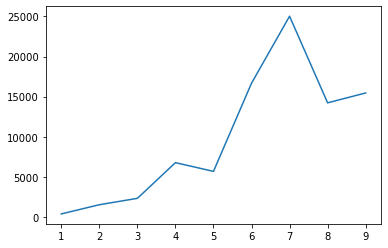

In [1]:
import numpy as np
import matplotlib.pyplot as plt

D_R = 0.01
D_T = 0.2*1e-6
v = 10*1e-6
L = 1             # Dimensions of square box
a = 0.1           # radius of particle
N = 100
k = 100           # potential consntant

X = np.random.uniform(0,1,N)
Y = np.random.uniform(0,1,N)
Theta = np.random.uniform(0,2*np.pi,N)
X_i = X
Y_i = Y

msd_t = []
tt = np.arange(1,10)
for t in tt:
    N_s = 200
    dt = t/N
    X = np.random.uniform(0,1,N)
    Y = np.random.uniform(0,1,N)
    Theta = np.random.uniform(0,2*np.pi,N)
    X_i = X
    Y_i = Y
    
    for k in range(N_s):
        # search process
        F_x = np.zeros(N)
        F_y = np.zeros(N)
        for i in range(N):
            x_i = X[i]
            y_i = Y[i]
            cnt = 0
            for j in range(N):
                x_j = X[j]
                y_j = Y[j]
                if(np.abs(x_i - x_j)>= L/2):
                    del_x = L - np.abs(x_i - x_j)
                else:
                    del_x = np.abs(x_i - x_j)

                if(np.abs(y_i - y_j)>= L/2):
                    del_y = L - np.abs(y_i - y_j)
                else:
                    del_y = np.abs(y_i - y_j)

                del_r = np.sqrt(del_x**2 + del_y**2)
                if(del_r ==0):
                    continue
                if(del_r <= 2*a):
                    cnt += 1
                    F_x[i] += 2*k*(del_r - 2*a)*del_x/np.sqrt(del_x**2 + del_y**2)
                    F_y[i] += 2*k*(del_r - 2*a)*del_y/np.sqrt(del_x**2 + del_y**2)

        X = X + v*np.cos(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_x*dt
        Y = Y + v*np.sin(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_y*dt
    msd_t.append(np.mean(np.power(X - X_i,2)+ np.power(Y - Y_i,2)))
    
plt.plot(tt,msd_t)

In [5]:
import numpy as np
a = [1,2,3]
print(np.power(a,2))

[1 4 9]
